# 概念

增加已有数据集的多样性

- 添加各种不同的背景噪声
- 改变图片的颜色和形状

通常做法是在线生成图片，在线生成，随机生成。等价于一个正则项。

- flip（左右，上下）
- 切割（然后转换到固定形状）：随机高宽，随机大小，随机位置
- color：色调，饱和度，亮度
- 高斯模糊
- 锐化

photoshop上面提供的内容，基本都可以当成是数据增广的手段。

手段有很多，我们通常应该是从后往前推的思路。思考可能test 集合的场景，场景有哪些特点，然后我们给train dataset做对应变换。

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn

In [5]:
import torchvision.transforms as T
from torchvision.io import read_image
# read a JPEG image
img = read_image('./img/cat.jpeg')

# display the image properties
print("Image size:\n", img.shape)
# check if input image is a PyTorch tensor
print("Is image a PyTorch Tensor:", torch.is_tensor(img))
print("Type of Image:", type(img))

Image size:
 torch.Size([3, 183, 276])
Is image a PyTorch Tensor: True
Type of Image: <class 'torch.Tensor'>


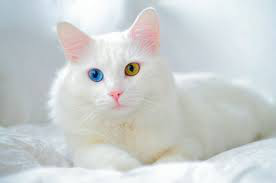

In [6]:
from PIL import Image
# convert the torch tensor to PIL image
PIL_img = T.ToPILImage()(img)
# display the image
display(PIL_img)

In [ ]:
import matplotlib.pyplot as plt

In [88]:
def show_images(Y, num_rows, num_cols, scale=4):
    figsize = (num_cols*scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, Y)):
        if torch.is_tensor(img):
            ax.imshow(img.permute(1,2,0).numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        

In [128]:
def apply(img, aug, num_rows=3, num_cols=3, scale=4):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    Y = list(map(T.ToPILImage(), Y))
    show_images(Y, num_rows, num_cols, scale=scale)

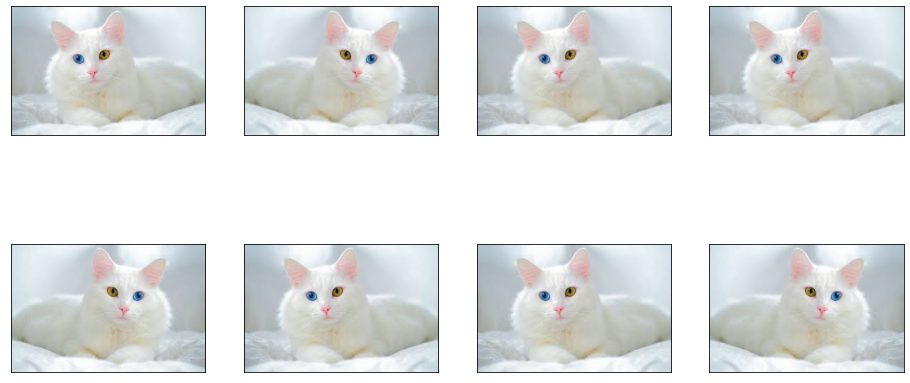

In [89]:
apply(img, torchvision.transforms.RandomHorizontalFlip()) # param2: is a function

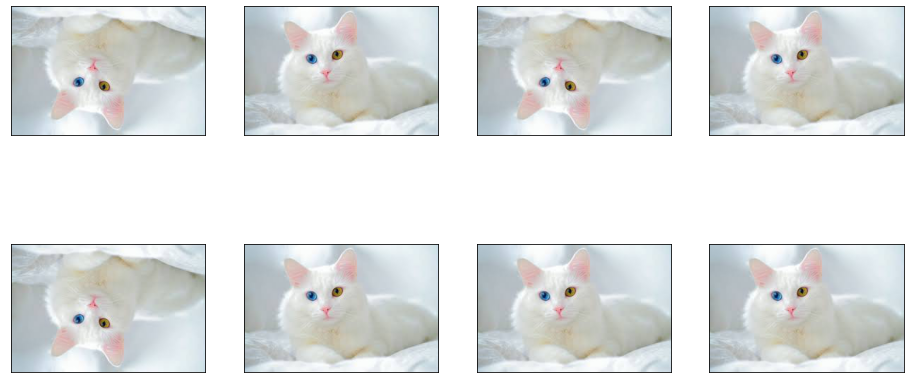

In [90]:
apply(img, torchvision.transforms.RandomVerticalFlip())

In [132]:
# ratio: 长宽比
shape_aug = torchvision.transforms.RandomResizedCrop((150, 200), scale=(0.2, 1.0), ratio=(0.5, 2))

# apply(img, shape_aug)

tensor([0.1356, 0.0500, 0.2806, 0.1252])


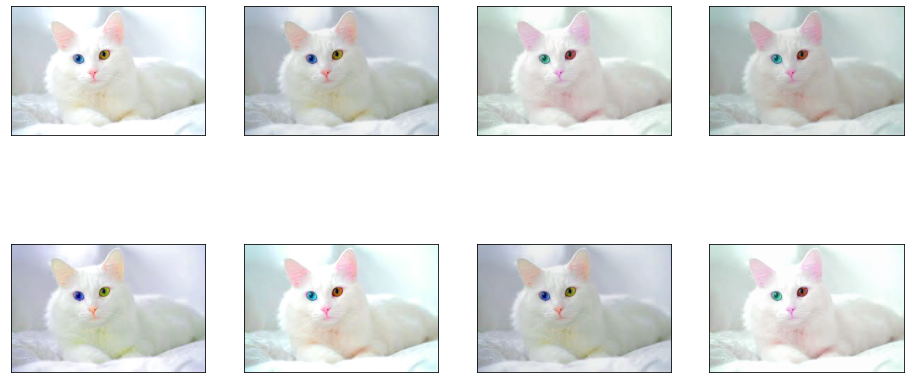

In [121]:
params = torch.rand(size=(4,))/2
print(params)
color_aug = torchvision.transforms.ColorJitter(
                brightness=params[0].item(), contrast=params[1].item(), saturation=params[2].item(), hue=params[3].item())
apply(img, color_aug)

In [133]:
augs = torchvision.transforms.Compose(
        [torchvision.transforms.RandomHorizontalFlip(),
         torchvision.transforms.RandomVerticalFlip(),
         shape_aug,
         color_aug
        ])

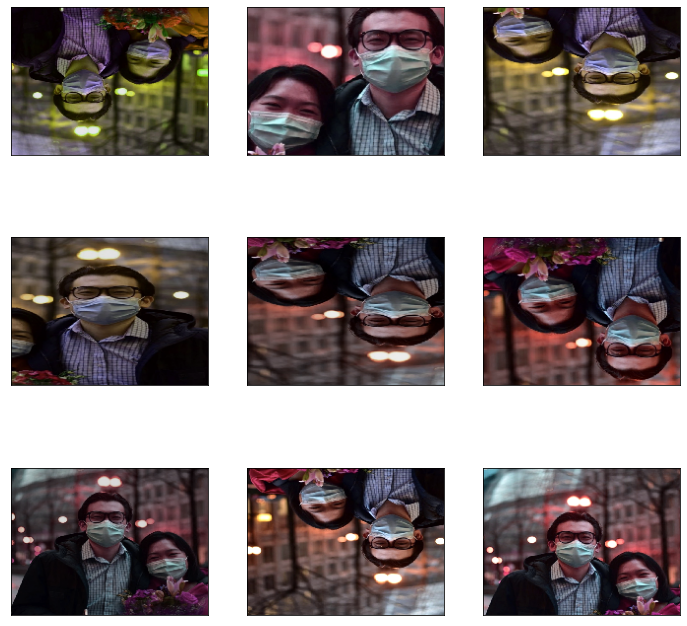

In [135]:
apply(img, augs)